In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [10]:
def u(X) :
    pre = q / (2*np.pi * (X[0]**2 + X[1]**2)) 
    return np.array([1+pre*X[0], pre*X[1]])

def NaiveRandomWalk(X0, N, T):
    ''' X0: initial position
        N: number of steps
        T: Final time'''
    X = []
    dt = T/N
    sigmaSqrtDt = sigma * np.sqrt(dt)
    X.append(X0)
    finalT = dt
    for i in range(N-1):
        X0 = X0 + u(X0) * dt + sigmaSqrtDt* norm.rvs(size=2)
        X.append(X0)
        finalT = finalT + dt
        r = np.sqrt( X0[0]**2 + X0[1]**2 )
        if(r<1):
            break
    
    return np.asarray(X), finalT

def deltaTBound(X, sigma, R):
    r = np.sqrt(X[0]**2 + X[1]**2)
    U = u(X)
    delta = sigma**4 + (U[0]**2 + U[1]**2) * (R-r)**2
    bound = - sigma**2 + np.sqrt(delta)
    return bound/(U[0]**2 + U[1]**2)

def RandomWalkAdaptiveTimeStep(X0, T):
    ''' X0: initial position
        T: Final time'''
    X = []
    coeff = 0.7  
    X.append(X0)
    finalT = 0
    for i in range(N-1):
        dt = coeff * deltaTBound(X0, sigma, R)
        X0 = X0 + u(X0) * dt + sigma * np.sqrt(dt)* norm.rvs(size=2)
        X.append(X0)
        finalT = finalT + dt
        r = np.sqrt( X0[0]**2 + X0[1]**2 )
        if(r<1 or finalT >= 1):
            break
    
    return np.asarray(X), finalT

In [11]:
q = 1
sigma = 2 
walks = 500
R = 1
T = 1
N = 200
dt = T/N
sigmaSqrtDt = sigma * np.sqrt(T/N)

1.1081664029996692


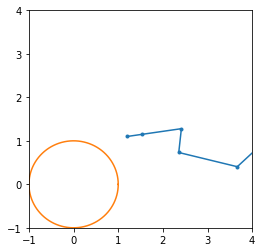

In [28]:
#X, finalTime = NaiveRandomWalk([1.2,1.1], N, T)
X, finalTime = RandomWalkAdaptiveTimeStep([1.2,1.1], T)

#plots the walk
plt.figure(figsize=[4,4])
X = X.T
plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-1,4])
plt.ylim([-1,4])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTime)

In [29]:
polluted = 0
X0 = [1.1,1.2]
X_next = [0,0]
polluted = np.zeros(walks)
for w in range(walks):
    #diff equation
    X_0 = [1.1,1.2]
    #_, finalT = NaiveRandomWalk(X0, N, T)
    if finalT < 1:
            polluted[w] = 1
            
print(polluted.mean())

0.462


In [8]:
chunks = 10
poll = polluted.reshape(chunks,-1)
means = np.zeros(chunks)
for i in range(chunks):
    means[i] = poll[i].mean()

In [9]:
means.std()

0.10315037566582101